In [ ]:
#objective is to predict student's knowledge level

In [48]:
#load libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, f1_score, confusion_matrix, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
#load data
df_train = pd.read_excel('../datasets/Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls',
                         sheet_name = 'Training_Data')

In [67]:
#load data
df_test = pd.read_excel('../datasets/Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls',
                         sheet_name = 'Test_Data')

In [69]:
#check data
df_train.head()

df_test.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.10,0.50,0.26,0.05,Very Low
1,0.05,0.05,0.55,0.60,0.14,Low
2,0.08,0.18,0.63,0.60,0.85,High
3,0.20,0.20,0.68,0.67,0.85,High
4,0.22,0.22,0.90,0.30,0.90,High


In [52]:
#check shape
print(df_train.shape, df_test.shape)

(258, 6) (145, 6)


In [63]:
#descriptive statistics
df_train.describe()

,STG,SCG,STR,LPR,PEG
count,258.000000,258.000000,258.000000,258.000000,258.000000
mean,0.371147,0.355674,0.468004,0.432713,0.458539
std,0.210271,0.211962,0.245940,0.248108,0.255211
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240750,0.210000,0.291250,0.250000,0.250000
50%,0.327000,0.302500,0.490000,0.330000,0.500000
75%,0.495000,0.497500,0.690000,0.647500,0.660000
max,0.990000,0.900000,0.950000,0.990000,0.930000


In [70]:
#recode UNS
cleanup_nums = {" UNS":{"very_low":1, "Low":2, "Middle":3, "High":4}}
df_train.replace(cleanup_nums, inplace=True)
df_test.replace(cleanup_nums, inplace=True)
df_train.head()


,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,1
1,0.08,0.08,0.10,0.24,0.90,4
2,0.06,0.06,0.05,0.25,0.33,2
3,0.10,0.10,0.15,0.65,0.30,3
4,0.08,0.08,0.08,0.98,0.24,2


In [71]:
df_train.dtypes

STG     float64
SCG     float64
STR     float64
LPR     float64
PEG     float64
 UNS      int64
dtype: object

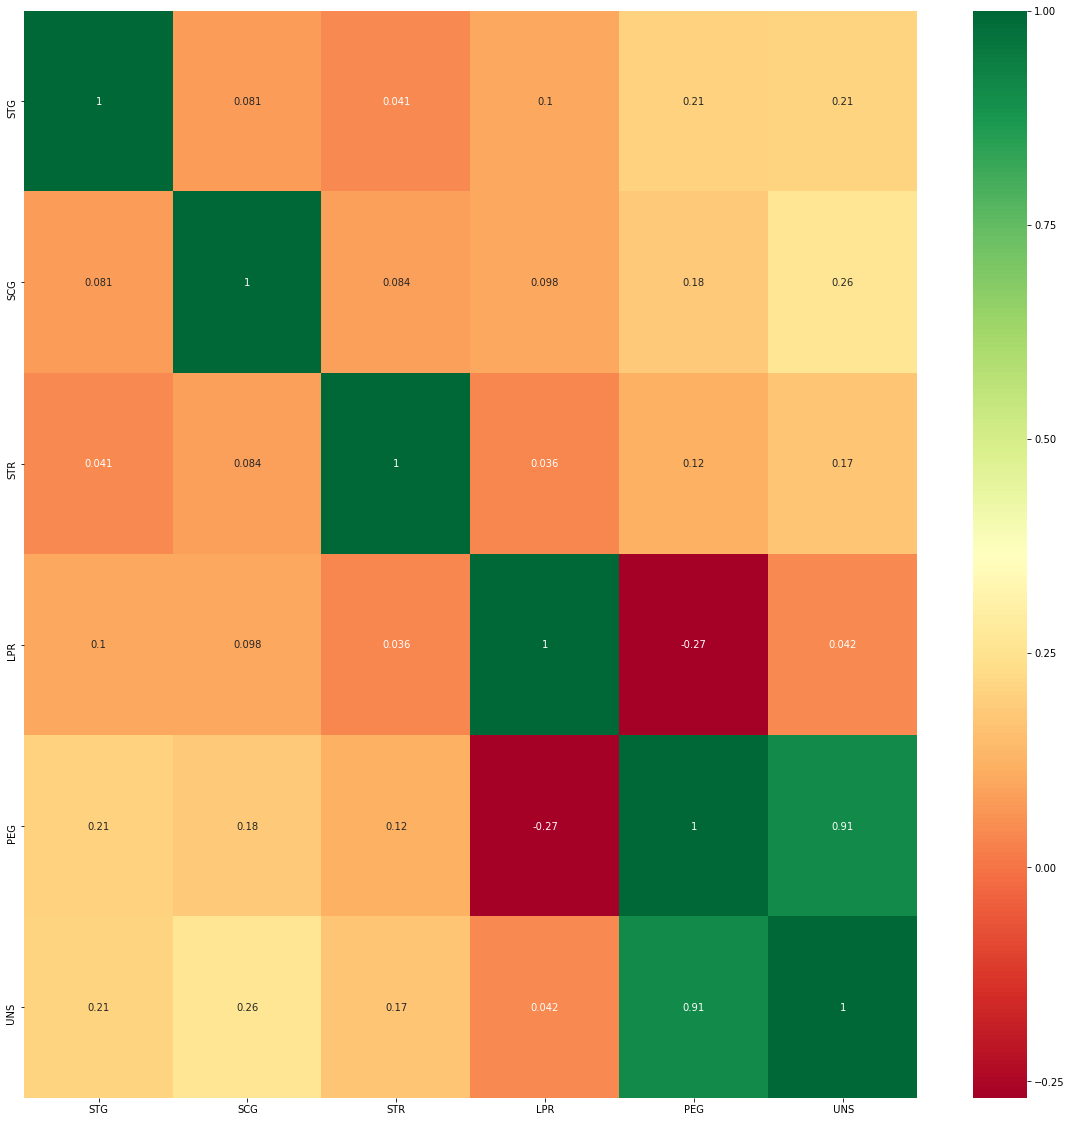

In [72]:
#correlation
x = df_train.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(x,cmap='RdYlGn',annot=True)
plt.show();

In [33]:
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df_train.loc[:, 'STG':'PEG'])
scaled_df = pd.DataFrame(scaled_df, columns=['STG','SCG','STR','LPR','PEG'])
scaled_df.head()

,STG,SCG,STR,LPR,PEG
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.080808,0.088889,0.105263,0.242424,0.967742
2,0.060606,0.066667,0.052632,0.252525,0.354839
3,0.101010,0.111111,0.157895,0.656566,0.322581
4,0.080808,0.088889,0.084211,0.989899,0.258065


In [39]:
#combine dataframe
                          


,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


In [ ]:
#perform classification
#get classification metrics